In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('./matches.csv')
deliveries = pd.read_csv('./deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
deliveries.shape

(179078, 21)

In [7]:
total_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df = total_score_df[total_score_df["inning"]==1]

In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on = 'id',right_on = 'match_id')

In [10]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
match_df['team1'] = match_df['team1'].str.replace( 'Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace( 'Delhi Daredevils','Delhi Capitals')


match_df['team1'] = match_df['team1'].str.replace( 'Deccan Chargers','Sunrisers Hyderabad')
match_df['team1'] = match_df['team1'].str.replace( 'Deccan Chargers','Sunrisers Hyderabad')

In [13]:
teams = ['Sunrisers Hyderabad', 
         'Mumbai Indians',
        
      
         'Royal Challengers Bangalore',
       'Kolkata Knight Riders',
        'Kings XI Punjab',
       'Chennai Super Kings',
         'Rajasthan Royals',
      
       'Delhi Capitals']

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(610, 20)

In [16]:
 match_df= match_df[match_df['dl_applied']==0]

In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [18]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [19]:
delivery_df=match_df.merge(deliveries,on ='match_id')

In [20]:
delivery_df = delivery_df[delivery_df['inning']==2]

In [21]:

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
142079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
142080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
142081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [22]:
# total_runs_x is target
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

In [23]:
delivery_df['balls_left']= 126 - (delivery_df['over']*6 +delivery_df['ball'])

In [24]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x =="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10-wickets


In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
142079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
142080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
142081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


In [26]:
## crr = runs/over
delivery_df['current_run_rate']=delivery_df['current_score']*6/(120 - delivery_df['balls_left'])

In [27]:
delivery_df['required_run_rate'] = delivery_df['runs_left']*6/delivery_df['balls_left']

In [28]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [29]:
delivery_df['result'] = delivery_df.apply(result, axis =1)

In [30]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,current_run_rate,required_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
142079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
142080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
142081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [31]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','current_run_rate','required_run_rate','result']]
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left']!=0]

C:\Users\HP\AppData\Local\Temp\ipykernel_17228\4080299846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [32]:
from sklearn.model_selection import train_test_split
X  = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
trf = ColumnTransformer([('trf', OneHotEncoder(sparse=False, drop = 'first'),['batting_team','bowling_team','city'])], remainder = 'passthrough')


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [35]:
final_df.isnull().sum()

batting_team         0
bowling_team         0
city                 0
runs_left            0
balls_left           0
wickets              0
total_runs_x         0
current_run_rate     0
required_run_rate    0
result               0
dtype: int64

In [36]:
pipe = Pipeline(steps = [
    ('step1',trf),
    ('step2',LogisticRegression(solver ='liblinear'))
# good for getting probabilities
 ])
# pipe = Pipeline(steps = [
#     ('step1',trf),
#     ('step2',RandomForestClassifier())
# ])

In [37]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [38]:
pipe.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [39]:
y_pred = pipe.predict(X_test)


In [49]:
pipe.predict_proba(X_test)[10]

array([0.58782452, 0.41217548])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8168327796234773

In [41]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id']==match_id]
    match = match[(match['ball']==6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','current_run_rate','required_run_rate','result']]
    temp_df = temp_df[temp_df['balls_left']!=0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
#     new_wickets = np.concatenate((np.array([10]), new_wickets))
    wickets.append(0)
#     wickets = np.concatenate((wickets, np.array([0])))
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw-w)[0:temp_df.shape[0]]
    
    print("Target",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    temp_df
    return temp_df, target








In [42]:
temp_df, target = match_progression(delivery_df, 74, pipe)

temp_df

Target 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10257,1,4,0,60.0,40.0
10265,2,8,0,54.9,45.1
10271,3,1,0,61.5,38.5
10277,4,7,1,72.5,27.5
10283,5,12,0,63.1,36.9
10289,6,13,0,51.1,48.9
10295,7,9,0,45.1,54.9
10303,8,15,0,30.8,69.2
10309,9,7,0,28.5,71.5
10316,10,17,0,16.0,84.0


In [43]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,current_run_rate,required_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
142079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
142080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
142081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


Text(0.5, 1.0, 'Target178')

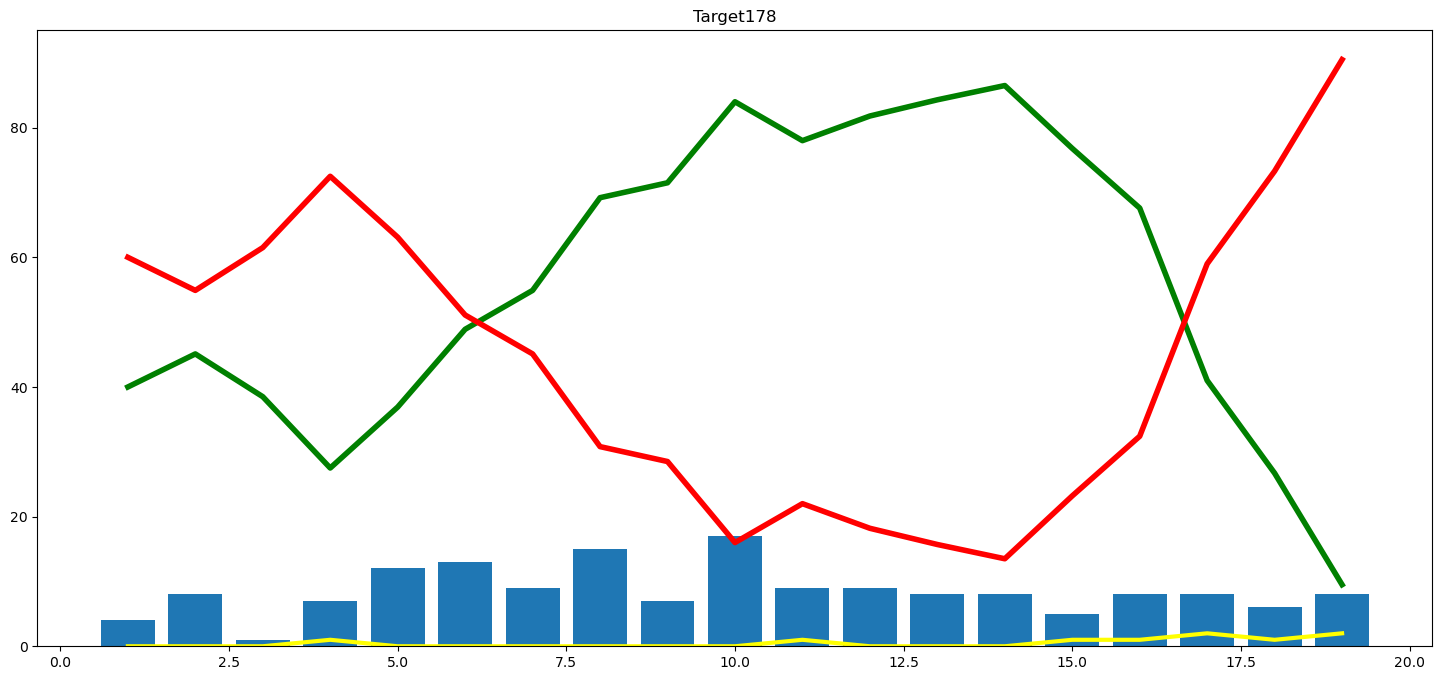

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'],color = 'yellow',linewidth = 3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color = 'green', linewidth = 4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red', linewidth = 4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target'+ str(target))

In [45]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [46]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [47]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

In [48]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,required_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
142077,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,5,152,7.878261,1.200000,0
142078,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
142079,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
142080,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
